## Predicting Stock Prices for Large Cap Technology Companies DS II

## Company Opted for Predicting the Stock Prices : APPLE

______________________________________________________________________________________________________________________________

# Model used for Predicting:LSTM [Long Short-Term Memory network]

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
plt.style.use('seaborn')

### Load the Data

In [ ]:
df = pd.read_csv('Price_News.csv')
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title
0,01-02-2015,$27.3325,212575080,$27.8475,$27.86,$26.8375,What to expect from Apple in 2015 beyond its s...
1,01-05-2015,$26.5625,256843520,$27.0725,$27.1625,$26.3525,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
2,01-06-2015,$26.565,262729000,$26.635,$26.8575,$26.1575,"Technology Transforming Cars Into ""Phones On W..."
3,01-07-2015,$26.9375,159933400,$26.8,$27.05,$26.6737,Apple issues fourth developer beta of OS X 10....
4,01-08-2015,$27.9725,236675040,$27.3075,$28.0375,$27.175,Apple company recalls 2014 shipments after lin...


In [ ]:
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title
0,01-02-2015,$27.3325,212575080,$27.8475,$27.86,$26.8375,What to expect from Apple in 2015 beyond its s...
1,01-05-2015,$26.5625,256843520,$27.0725,$27.1625,$26.3525,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
2,01-06-2015,$26.565,262729000,$26.635,$26.8575,$26.1575,"Technology Transforming Cars Into ""Phones On W..."
3,01-07-2015,$26.9375,159933400,$26.8,$27.05,$26.6737,Apple issues fourth developer beta of OS X 10....
4,01-08-2015,$27.9725,236675040,$27.3075,$28.0375,$27.175,Apple company recalls 2014 shipments after lin...


In [ ]:
df.tail()

,Date,Close,Volume,Open,High,Low,Headlines Title
1615,06-03-2021,$123.54,76229170,$124.68,$124.85,$123.13,Buy RH Stock on the Dip Before Q1 Earnings for...
1616,06-04-2021,$125.89,75169340,$124.07,$126.16,$123.85,"Global equities nearly grasp all-time record, ..."
1617,06-07-2021,$125.9,71057550,$126.17,$126.32,$124.8321,Apple&quot;s new &quot;private relay&quot; fea...
1618,06-08-2021,$126.74,74403770,$126.6,$128.46,$126.2101,"Apple, Chinese manufacturers in talks on US ca..."
1619,06-09-2021,$127.13,56877940,$127.21,$127.75,$126.52,athenahealth is set to support the iOS 15 Feat...


In [ ]:
df.isnull().sum()

Date               0
Close              0
Volume             0
Open               0
High               0
Low                0
Headlines Title    0
dtype: int64

In [ ]:
sum(df.duplicated())

0

In [ ]:
len(df)

1620

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             1620 non-null   object
 1   Close            1620 non-null   object
 2   Volume           1620 non-null   int64 
 3   Open             1620 non-null   object
 4   High             1620 non-null   object
 5   Low              1620 non-null   object
 6   Headlines Title  1620 non-null   object
dtypes: int64(1), object(6)
memory usage: 88.7+ KB


### Convert the Data

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df["Date"]= df["Date"].dt.strftime("%d/%m/%y")

In [ ]:
df['Close'] = df['Close'].str.replace('$', '')
df['Close'] = df['Close'].astype('float')

In [ ]:
df['Open']=df['Open'].str.replace('$','').astype(float)

In [ ]:
df['High'] = df['High'].str.replace('$', '')
df['High'] = df['High'].astype('float')

In [ ]:
df['Low'] = df['Low'].str.replace('$', '')
df['Low'] = df['Low'].astype('float')

In [ ]:
df['Volume'] = df['Volume'].astype('float')

In [ ]:
df.dtypes

Date                object
Close              float64
Volume             float64
Open               float64
High               float64
Low                float64
Headlines Title     object
dtype: object

### Preprocessing the Data

#### Removing Punctuations

In [ ]:
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,What to expect from Apple in 2015 beyond its s...
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,"Technology Transforming Cars Into ""Phones On W..."
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,Apple issues fourth developer beta of OS X 10....
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,Apple company recalls 2014 shipments after lin...


In [ ]:
df['Headlines Title'].replace("[^a-zA-Z]"," ",regex=True,inplace=True)
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,What to expect from Apple in beyond its s...
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,SIM free iPhone Plus reportedly debuting ...
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,Technology Transforming Cars Into Phones On W...
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,Apple issues fourth developer beta of OS X ...
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,Apple company recalls shipments after lin...


#### Converting Headlines to lower case

In [ ]:
for index in ['Headlines Title']:
    df[index]=df[index].str.lower()
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,what to expect from apple in beyond its s...
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,sim free iphone plus reportedly debuting ...
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,technology transforming cars into phones on w...
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,apple issues fourth developer beta of os x ...
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,apple company recalls shipments after lin...


### Sentimental Analysis

In [ ]:
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata


# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
df['compound'] = df['Headlines Title'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['negative'] = df['Headlines Title'].apply(lambda x: sid.polarity_scores(x)['neg'])
df['neutral'] = df['Headlines Title'].apply(lambda x: sid.polarity_scores(x)['neu'])
df['positive'] = df['Headlines Title'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the data
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title,compound,negative,neutral,positive
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,what to expect from apple in beyond its s...,0.9875,0.041,0.849,0.110
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,sim free iphone plus reportedly debuting ...,0.9979,0.033,0.807,0.159
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,technology transforming cars into phones on w...,0.8779,0.049,0.883,0.068
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,apple issues fourth developer beta of os x ...,-0.8225,0.076,0.862,0.062
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,apple company recalls shipments after lin...,0.9973,0.039,0.828,0.132


In [ ]:
from textblob import TextBlob
polarity = []
subjectivity = []
for idx, row in df.iterrows():
  polarity.append(TextBlob(row['Headlines Title']).sentiment[0])
  subjectivity.append(TextBlob(row['Headlines Title']).sentiment[1])

In [ ]:
df['polarity'] = polarity
df['subjectivity'] = subjectivity
df.head()

,Date,Close,Volume,Open,High,Low,Headlines Title,compound,negative,neutral,positive,polarity,subjectivity
0,02/01/15,27.3325,212575080.0,27.8475,27.8600,26.8375,what to expect from apple in beyond its s...,0.9875,0.041,0.849,0.110,0.140552,0.527698
1,05/01/15,26.5625,256843520.0,27.0725,27.1625,26.3525,sim free iphone plus reportedly debuting ...,0.9979,0.033,0.807,0.159,0.129695,0.447602
2,06/01/15,26.5650,262729000.0,26.6350,26.8575,26.1575,technology transforming cars into phones on w...,0.8779,0.049,0.883,0.068,0.108243,0.347794
3,07/01/15,26.9375,159933400.0,26.8000,27.0500,26.6737,apple issues fourth developer beta of os x ...,-0.8225,0.076,0.862,0.062,0.125090,0.410056
4,08/01/15,27.9725,236675040.0,27.3075,28.0375,27.1750,apple company recalls shipments after lin...,0.9973,0.039,0.828,0.132,0.136965,0.400757


### Finilazing the Data

In [ ]:
# dropping the 'Headlines Title' which is not required
df.drop(['Headlines Title'], inplace=True, axis=1)

# rearranging the columns of the whole stock_data
df = df[['Date','Close', 'compound', 'negative', 'neutral', 'positive','polarity','subjectivity','Open', 'High', 'Low', 'Volume']]

# displaying the final data
df.head()

,Date,Close,compound,negative,neutral,positive,polarity,subjectivity,Open,High,Low,Volume
0,02/01/15,27.3325,0.9875,0.041,0.849,0.110,0.140552,0.527698,27.8475,27.8600,26.8375,212575080.0
1,05/01/15,26.5625,0.9979,0.033,0.807,0.159,0.129695,0.447602,27.0725,27.1625,26.3525,256843520.0
2,06/01/15,26.5650,0.8779,0.049,0.883,0.068,0.108243,0.347794,26.6350,26.8575,26.1575,262729000.0
3,07/01/15,26.9375,-0.8225,0.076,0.862,0.062,0.125090,0.410056,26.8000,27.0500,26.6737,159933400.0
4,08/01/15,27.9725,0.9973,0.039,0.828,0.132,0.136965,0.400757,27.3075,28.0375,27.1750,236675040.0


In [ ]:
df.tail()

,Date,Close,compound,negative,neutral,positive,polarity,subjectivity,Open,High,Low,Volume
1615,03/06/21,123.54,0.9945,0.042,0.868,0.090,0.116462,0.337818,124.68,124.85,123.1300,76229170.0
1616,04/06/21,125.89,0.9939,0.024,0.902,0.074,0.134752,0.407989,124.07,126.16,123.8500,75169340.0
1617,07/06/21,125.90,0.9988,0.020,0.869,0.111,0.174406,0.456795,126.17,126.32,124.8321,71057550.0
1618,08/06/21,126.74,0.9975,0.027,0.873,0.101,0.141016,0.429049,126.60,128.46,126.2101,74403770.0
1619,09/06/21,127.13,0.9928,0.034,0.889,0.077,0.157241,0.392757,127.21,127.75,126.5200,56877940.0


In [ ]:
# writing the prepared stock_data to disk
#df.to_csv('stocks data.csv')

_______________________________________________________________________________________________________________________________

# LSTM

### Load the Data

In [ ]:
stock_data = pd.read_csv('stocks data1.csv', index_col = False)
# setting the column 'Date' as the index column)
stock_data.set_index('Date', inplace=True)
# displaying the stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,polarity,subjectivity,Open,High,Low,Volume
Date,,,,,,,,,,,
02-01-2015,27.3325,0.9875,0.041,0.849,0.110,0.140552,0.527698,27.8475,27.8600,26.8375,212575080
05-01-2015,26.5625,0.9979,0.033,0.807,0.159,0.129695,0.447602,27.0725,27.1625,26.3525,256843520
06-01-2015,26.5650,0.8779,0.049,0.883,0.068,0.108243,0.347794,26.6350,26.8575,26.1575,262729000
07-01-2015,26.9375,-0.8225,0.076,0.862,0.062,0.125090,0.410056,26.8000,27.0500,26.6737,159933400
08-01-2015,27.9725,0.9973,0.039,0.828,0.132,0.136965,0.400757,27.3075,28.0375,27.1750,236675040


In [ ]:
stock_data.tail()

,Close,compound,negative,neutral,positive,polarity,subjectivity,Open,High,Low,Volume
Date,,,,,,,,,,,
03-06-2021,123.54,0.9945,0.042,0.868,0.090,0.116462,0.337818,124.68,124.85,123.1300,76229170
04-06-2021,125.89,0.9939,0.024,0.902,0.074,0.134752,0.407989,124.07,126.16,123.8500,75169340
07-06-2021,125.90,0.9988,0.020,0.869,0.111,0.174406,0.456795,126.17,126.32,124.8321,71057550
08-06-2021,126.74,0.9975,0.027,0.873,0.101,0.141016,0.429049,126.60,128.46,126.2101,74403770
09-06-2021,127.13,0.9928,0.034,0.889,0.077,0.157241,0.392757,127.21,127.75,126.5200,56877940


### Feature Engineering of Stock Data

In [ ]:
stock_data.shape

(1620, 11)

In [ ]:
# checking for null values
stock_data.isna().any()

Close           False
compound        False
negative        False
neutral         False
positive        False
polarity        False
subjectivity    False
Open            False
High            False
Low             False
Volume          False
dtype: bool

In [ ]:
# displaying stock_data statistics
stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,polarity,subjectivity,Open,High,Low,Volume
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1.620000e+03
mean,53.529456,0.717417,0.059323,0.831951,0.108716,0.129418,0.416863,53.512073,54.082343,52.936627,1.423574e+08
std,31.552340,0.599247,0.027441,0.037628,0.031047,0.065594,0.059917,31.583126,31.994029,31.099052,7.006146e+07
min,22.585000,-0.999500,0.000000,0.694000,0.000000,-0.133333,0.100000,22.500000,22.917500,22.367500,4.544820e+07
25%,30.503750,0.900475,0.041000,0.809000,0.088000,0.090451,0.378748,30.525625,30.822500,30.375625,9.447815e+07
50%,42.795000,0.986250,0.055000,0.834000,0.107000,0.129708,0.417707,42.830000,43.226250,42.449400,1.245709e+08
75%,60.613125,0.995425,0.074000,0.858000,0.128000,0.170173,0.455677,60.496875,61.350000,59.397500,1.690195e+08
max,143.160000,0.999600,0.228000,0.974000,0.251000,0.533333,0.733333,143.600000,145.090000,141.370000,6.475300e+08


Text(0, 0.5, 'Close Price USD ($)')

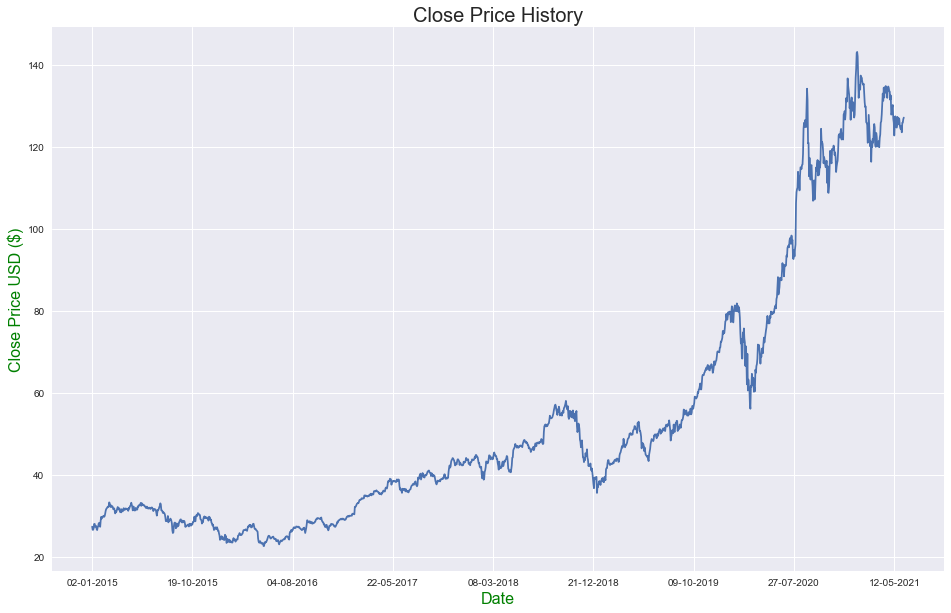

In [ ]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stock_data['Close'].plot()

# setting plot title, x and y labels
plt.title('Close Price History', fontsize = 20)
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 16, color = 'g')

In [ ]:
# calculating 7 day rolling mean
stock_data.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,polarity,subjectivity,Open,High,Low,Volume
Date,,,,,,,,,,,
02-01-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-01-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-01-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-01-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08-01-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-01-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12-01-2015,27.240714,0.718729,0.056429,0.822000,0.121429,0.141867,0.436767,27.425714,27.633929,26.849814,2.202319e+08
13-01-2015,27.272500,0.720386,0.054286,0.814857,0.130714,0.147467,0.423983,27.427143,27.682500,26.905529,2.281326e+08
14-01-2015,27.399286,0.714986,0.060714,0.817000,0.122286,0.142224,0.422321,27.453929,27.748214,27.015886,2.192854e+08


<AxesSubplot:xlabel='Date'>

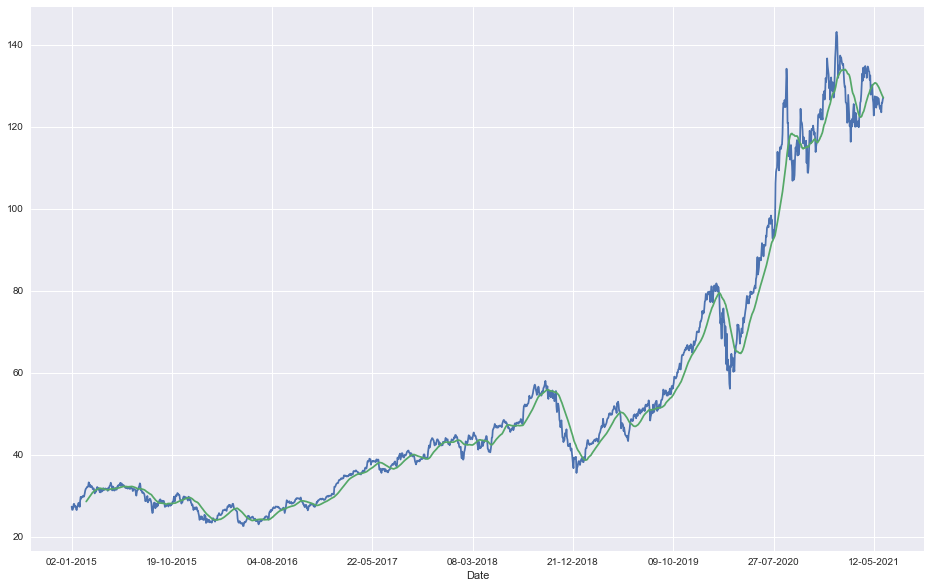

In [ ]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

### Data Preparation for Modelling

In [ ]:
# capturing data to be used for each column
close_price = stock_data.iloc[:,0] #close

# printing close price
print("Close Price:")
close_price

Close Price:


Date
02-01-2015     27.3325
05-01-2015     26.5625
06-01-2015     26.5650
07-01-2015     26.9375
08-01-2015     27.9725
                ...   
03-06-2021    123.5400
04-06-2021    125.8900
07-06-2021    125.9000
08-06-2021    126.7400
09-06-2021    127.1300
Name: Close, Length: 1620, dtype: float64

In [ ]:
# concatenating the captured training data into a dataframe
need_data = pd.concat([close_price], axis=1)

# setting column names of the revised stock data
need_data.columns = ['close_price']  
need_data.tail(20)

,close_price
Date,
12-05-2021,122.77
13-05-2021,124.97
14-05-2021,127.45
17-05-2021,126.27
18-05-2021,124.85
19-05-2021,124.69
20-05-2021,127.31
21-05-2021,125.43
24-05-2021,127.10


In [ ]:
# Convert the dataframe to a numpy array
dataset = need_data.values

In [ ]:
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1296

### Scaling the Target Variable and the Feature Dataset

In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.03937383]
 [0.03298777]
 [0.0330085 ]
 ...
 [0.85685258]
 [0.8638192 ]
 [0.8670537 ]]


In [ ]:
# Create the training data set
train_data = scaled_data[0:training_data_len , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
past_days = 20
for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i, :])
    y_train.append(train_data[i, 0])
    if i<= past_days:
        print(x_train)
        print(y_train)
        print()

[array([[0.03937383],
       [0.03298777],
       [0.0330085 ],
       [0.03609786],
       [0.04468173],
       [0.04493054],
       [0.03920796],
       [0.04121916],
       [0.04034833],
       [0.0341696 ],
       [0.03244868],
       [0.03810906],
       [0.03982998],
       [0.04573917],
       [0.04694174],
       [0.04719055],
       [0.03897989],
       [0.05177276],
       [0.05921626],
       [0.05560854]])]
[0.0586564379017209]



In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping the Feature Dataset

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train


array([[[0.03937383],
        [0.03298777],
        [0.0330085 ],
        ...,
        [0.05177276],
        [0.05921626],
        [0.05560854]],

       [[0.03298777],
        [0.0330085 ],
        [0.03609786],
        ...,
        [0.05921626],
        [0.05560854],
        [0.05865644]],

       [[0.0330085 ],
        [0.03609786],
        [0.04468173],
        ...,
        [0.05560854],
        [0.05865644],
        [0.05869791]],

       ...,

       [[0.47267261],
        [0.4532656 ],
        [0.4713871 ],
        ...,
        [0.48368236],
        [0.47679867],
        [0.46176654]],

       [[0.4532656 ],
        [0.4713871 ],
        [0.4851752 ],
        ...,
        [0.47679867],
        [0.46176654],
        [0.4309351 ]],

       [[0.4713871 ],
        [0.4851752 ],
        [0.4842007 ],
        ...,
        [0.46176654],
        [0.4309351 ],
        [0.40999378]]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1276, 20, 1)
(1276,)


### Stock Data Modelling

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(160, return_sequences=True, activation = "tanh", input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences= False, activation = "tanh"))
model.add(Dense(60))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 160)           103680    
_________________________________________________________________
dropout (Dropout)            (None, 20, 160)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 80)                77120     
_________________________________________________________________
dense (Dense)                (None, 60)                4860      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 185,721
Trainable params: 185,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1,patience = 5)

history = model.fit(x_train, y_train, batch_size = 64, epochs = 100, verbose = 1, validation_split = 0.2, callbacks = [early_stop])

Epoch 1/100
16/16 [==============================] - 18s 132ms/step - loss: 0.0054 - val_loss: 4.7715e-04
Epoch 2/100
16/16 [==============================] - 1s 64ms/step - loss: 4.5749e-04 - val_loss: 8.9174e-04
Epoch 3/100
16/16 [==============================] - 1s 65ms/step - loss: 2.2051e-04 - val_loss: 5.9146e-04
Epoch 4/100
16/16 [==============================] - 1s 62ms/step - loss: 1.4596e-04 - val_loss: 2.6190e-04
Epoch 5/100
16/16 [==============================] - 1s 61ms/step - loss: 1.2164e-04 - val_loss: 2.7382e-04
Epoch 6/100
16/16 [==============================] - 1s 64ms/step - loss: 1.0358e-04 - val_loss: 3.4983e-04
Epoch 7/100
16/16 [==============================] - 1s 61ms/step - loss: 1.1660e-04 - val_loss: 2.5508e-04
Epoch 8/100
16/16 [==============================] - 1s 61ms/step - loss: 1.0658e-04 - val_loss: 3.1587e-04
Epoch 9/100
16/16 [==============================] - 1s 62ms/step - loss: 1.0792e-04 - val_loss: 3.6095e-04
Epoch 10/100
16/16 [==========

<AxesSubplot:>

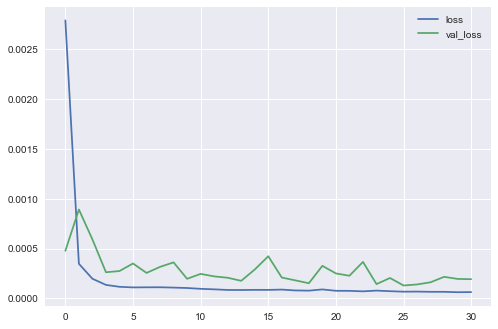

In [ ]:
# Plotting loss
loss = pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - past_days: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, :])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Prediction

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
predictions

array([[ 74.11729 ],
       [ 72.024605],
       [ 69.96992 ],
       [ 69.12897 ],
       [ 68.83574 ],
       [ 69.39032 ],
       [ 70.070625],
       [ 70.60385 ],
       [ 70.19129 ],
       [ 69.899506],
       [ 69.381004],
       [ 67.84586 ],
       [ 66.92287 ],
       [ 65.274315],
       [ 63.78242 ],
       [ 62.370464],
       [ 61.153576],
       [ 59.70604 ],
       [ 58.166344],
       [ 57.559235],
       [ 57.568798],
       [ 58.449684],
       [ 59.37935 ],
       [ 60.42129 ],
       [ 61.403767],
       [ 61.722775],
       [ 61.738644],
       [ 61.431595],
       [ 61.714172],
       [ 62.176422],
       [ 62.946808],
       [ 63.897438],
       [ 64.94408 ],
       [ 66.45296 ],
       [ 67.90348 ],
       [ 69.20773 ],
       [ 70.094894],
       [ 70.407776],
       [ 70.00914 ],
       [ 69.44627 ],
       [ 68.837975],
       [ 68.541   ],
       [ 68.51368 ],
       [ 68.48437 ],
       [ 68.78199 ],
       [ 69.47146 ],
       [ 70.13251 ],
       [ 70.8

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  4.587044402699412


In [ ]:
from sklearn.metrics import r2_score
R2_Score=(r2_score(y_test,predictions)*100)
print("R2 Score = ",R2_Score)

R2 Score =  93.33804725421822


### Plotting the Prediction

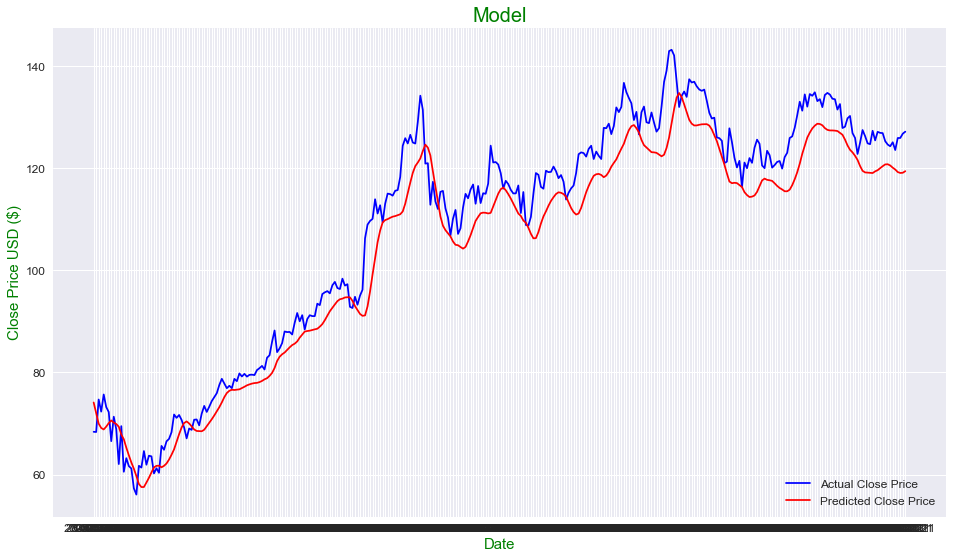

In [ ]:
# Plot the data
import copy
valid = copy.deepcopy(stock_data[training_data_len:])
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,9))
plt.title('Model', fontsize = 20,color = 'g')
plt.xlabel('Date', fontsize= 15, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 15, color = 'g')
plt.plot(valid['Close'], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'],  color = 'red', label = 'Predicted Close Price')
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [ ]:
# Show the valid and Predicted Prices
valid

,Close,compound,negative,neutral,positive,polarity,subjectivity,Open,High,Low,Volume,Predictions
Date,,,,,,,,,,,,
27-02-2020,68.3800,-0.9209,0.089,0.835,0.075,0.144260,0.404906,70.2750,71.5000,68.2400,320605520,74.117287
28-02-2020,68.3400,0.8441,0.047,0.888,0.065,-0.062970,0.385005,64.3150,69.6025,64.0925,426884800,72.024605
02-03-2020,74.7025,0.8747,0.091,0.821,0.088,0.085581,0.358134,70.5700,75.3600,69.4300,341397360,69.969917
03-03-2020,72.3300,0.9946,0.065,0.821,0.115,0.082967,0.368845,75.9175,76.0000,71.4500,319475400,69.128967
04-03-2020,75.6850,0.9699,0.060,0.847,0.094,0.128331,0.373890,74.1100,75.8500,73.2825,219178280,68.835739
...,...,...,...,...,...,...,...,...,...,...,...,...
03-06-2021,123.5400,0.9945,0.042,0.868,0.090,0.116462,0.337818,124.6800,124.8500,123.1300,76229170,119.720406
04-06-2021,125.8900,0.9939,0.024,0.902,0.074,0.134752,0.407989,124.0700,126.1600,123.8500,75169340,119.226776
07-06-2021,125.9000,0.9988,0.020,0.869,0.111,0.174406,0.456795,126.1700,126.3200,124.8321,71057550,119.047722


### Predicting Close price for next day after the Historical data ends

In [ ]:
import datetime
last_day = stock_data.index[-1]
print(last_day)

09-06-2021


In [ ]:
# Getting next day from where the Historical Dataset ends
import datetime
next_day = datetime.date(2021, 6, 10)
next_day.strftime("%d-%m-%Y")

'10-06-2021'

In [ ]:
# Create a new dataframe
new_df = stock_data.filter(['Close'])
# Get the last 20 day closing price values and convert the dataframe to an array
last_20_days = new_df[-20: ].values
# Scale the data to be values between 0 and 1
last_20_days_scaled = scaler.transform(last_20_days)
# Create an empty list
x_test = []
# Append the past 20 days
x_test.append(last_20_days_scaled)
# Convert the X_test data set to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(x_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print('Predicted Close Price for {} '.format(next_day) + ' = ', pred_price)

Predicted Close Price for 2021-06-10  =  [[119.88295]]


In [ ]:
previous = pred_price
previous_pred_price = new_df.at[str(last_day), 'Close']

In [ ]:
print('Predicted Close Price for {} '.format(last_day) + ' = ', previous_pred_price)

Predicted Close Price for 09-06-2021  =  127.13


In [ ]:
diff=(float)(pred_price - previous_pred_price)
if(diff < 0):
  print("percentage decrease = ",round(((- (diff)/previous_pred_price)*100),4))
else:
  print("percentage increase = ",round((( (diff)/previous_pred_price)*100),4))

percentage decrease =  5.7005


In [ ]:
from keras.models import load_model
model.save('stock_pred_model.h5') 